In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error

### FPProphet

In [6]:
from fbprophet import Prophet

In [7]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [7]:
all_sales = pd.read_csv('all_sales.csv')

In [14]:
# Predict the number of sales a year ahead (period = 365) using fbprophet.Prophet()
all_sales.columns = ['ds', 'y']
pr = Prophet()
pr.fit(all_sales)
future = pr.make_future_dataframe(periods=365)
forecast = pr.predict(future)
forecast


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,332114.062111,238767.931669,5.127718e+05,332114.062111,3.321141e+05,43664.550649,43664.550649,43664.550649,-68156.883976,-68156.883976,-68156.883976,111821.434625,111821.434625,111821.434625,0.0,0.0,0.0,3.757786e+05
1,2013-01-02,332493.518831,243839.273627,5.267977e+05,332493.518831,3.324935e+05,55739.408111,55739.408111,55739.408111,-44192.382164,-44192.382164,-44192.382164,99931.790276,99931.790276,99931.790276,0.0,0.0,0.0,3.882329e+05
2,2013-01-03,332872.975551,150892.164448,4.364904e+05,332872.975551,3.328730e+05,-43855.342746,-43855.342746,-43855.342746,-131877.344814,-131877.344814,-131877.344814,88022.002068,88022.002068,88022.002068,0.0,0.0,0.0,2.890176e+05
3,2013-01-04,333252.432271,211516.147227,4.919711e+05,333252.432271,3.332524e+05,19241.528060,19241.528060,19241.528060,-57028.521302,-57028.521302,-57028.521302,76270.049362,76270.049362,76270.049362,0.0,0.0,0.0,3.524940e+05
4,2013-01-05,333631.888990,387443.708822,6.668907e+05,333631.888990,3.336319e+05,198845.734957,198845.734957,198845.734957,134001.909925,134001.909925,134001.909925,64843.825032,64843.825032,64843.825032,0.0,0.0,0.0,5.324776e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2018-08-11,996967.858867,904809.721396,1.199529e+06,941715.918432,1.049522e+06,62297.502921,62297.502921,62297.502921,134001.909925,134001.909925,134001.909925,-71704.407004,-71704.407004,-71704.407004,0.0,0.0,0.0,1.059265e+06
2045,2018-08-12,997243.261313,962502.699374,1.264404e+06,941787.637065,1.049965e+06,116212.910368,116212.910368,116212.910368,188397.998502,188397.998502,188397.998502,-72185.088134,-72185.088134,-72185.088134,0.0,0.0,0.0,1.113456e+06
2046,2018-08-13,997518.663759,752032.259396,1.055826e+06,941814.726234,1.050273e+06,-93148.935037,-93148.935037,-93148.935037,-21144.776172,-21144.776172,-21144.776172,-72004.158865,-72004.158865,-72004.158865,0.0,0.0,0.0,9.043697e+05
2047,2018-08-14,997794.066205,708707.873151,1.012042e+06,941729.171349,1.050582e+06,-139320.375212,-139320.375212,-139320.375212,-68156.883976,-68156.883976,-68156.883976,-71163.491237,-71163.491237,-71163.491237,0.0,0.0,0.0,8.584737e+05


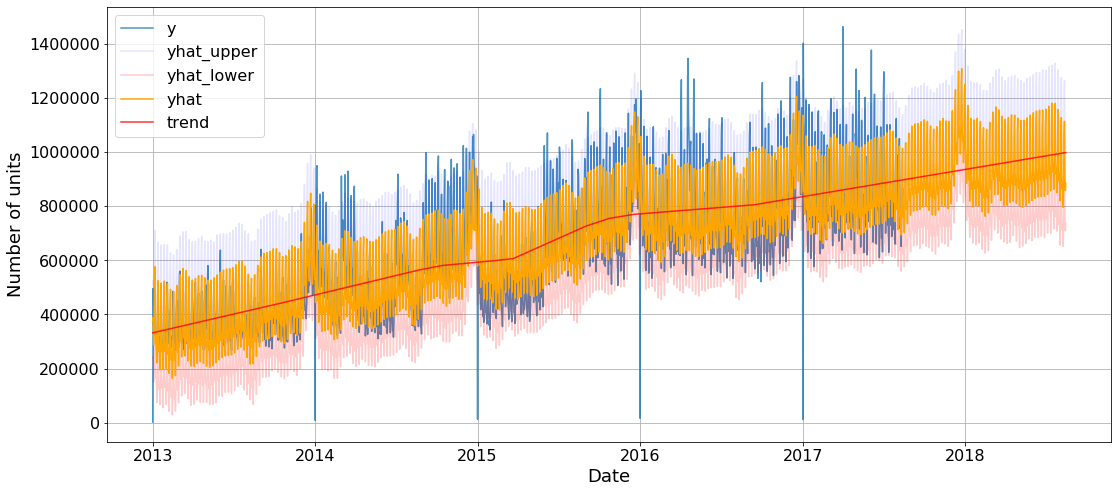

In [50]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
x_ticks = dates
ax.plot(all_sales['ds'], all_sales['y'], alpha=0.8) 
ax.plot(forecast['ds'], forecast['yhat_upper'], 'blue', alpha=0.1)
ax.plot(forecast['ds'], forecast['yhat_lower'], 'r', alpha=0.2)
ax.plot(forecast['ds'], forecast['yhat'], color='orange', alpha=1)
ax.plot(forecast['ds'], forecast['trend'], 'r', alpha=0.8)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Number of units', fontsize=18)
ax.grid()
ax.legend(['y', 'yhat_upper', 'yhat_lower', 'yhat', 'trend'], fontsize=16)

In [51]:
py.iplot([
    go.Scatter(x=all_sales['ds'], y=all_sales['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

In [52]:
print(f'RMSE: ', mean_squared_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))
print(f'MAE: ', mean_absolute_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAPE: ', mean_absolute_percentage_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))

RMSE:  11627681068.231844
MAE:  78695.88686866521
MAPE:  36.203411192598736


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


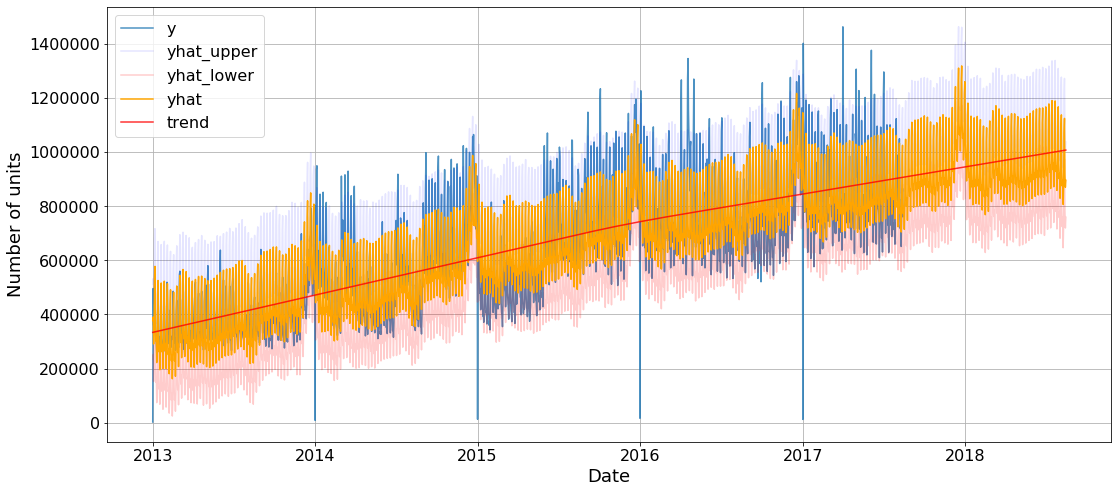

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


changepoint_prior_scale=0.01, RMSE: 12285623839.018887


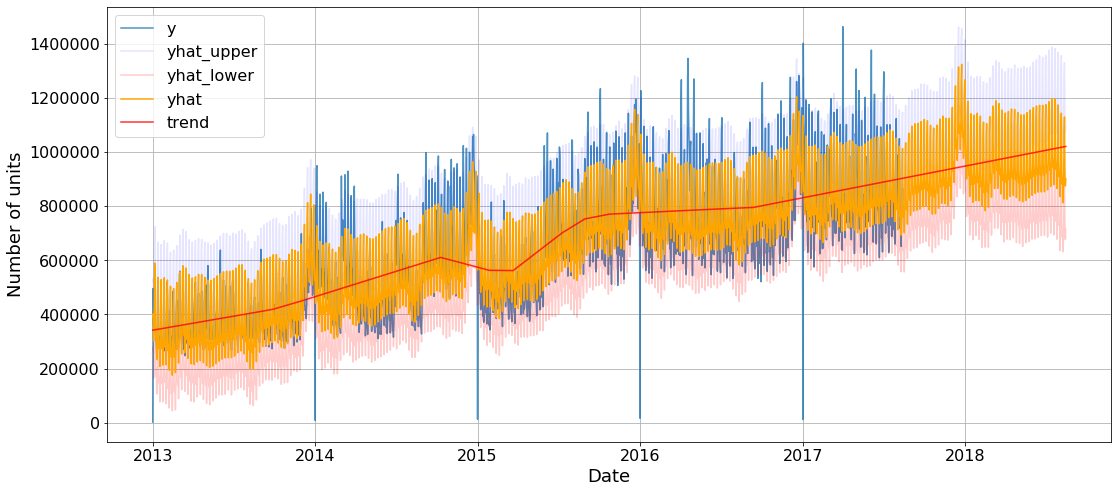

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


changepoint_prior_scale=0.1, RMSE: 10939970340.290186


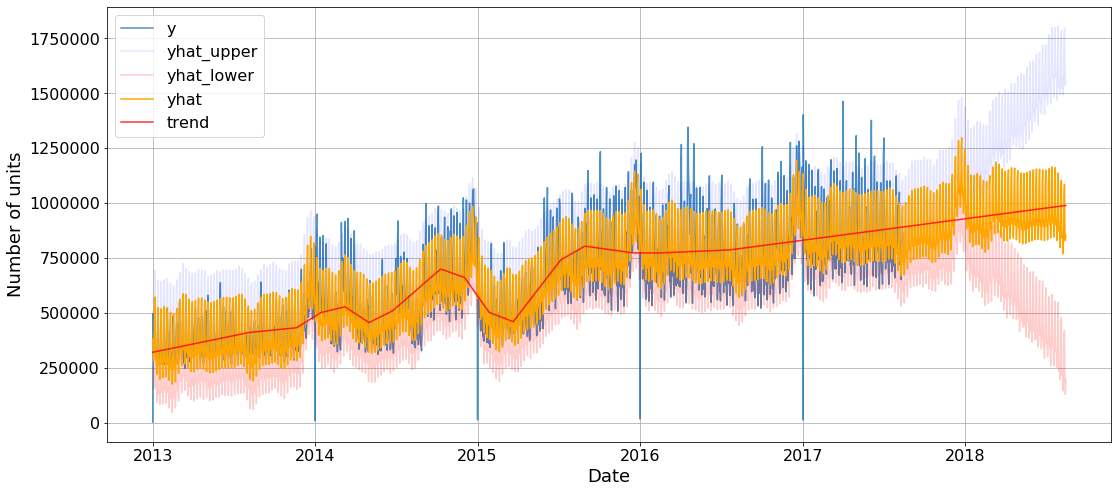

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


changepoint_prior_scale=0.5, RMSE: 9715788605.83014


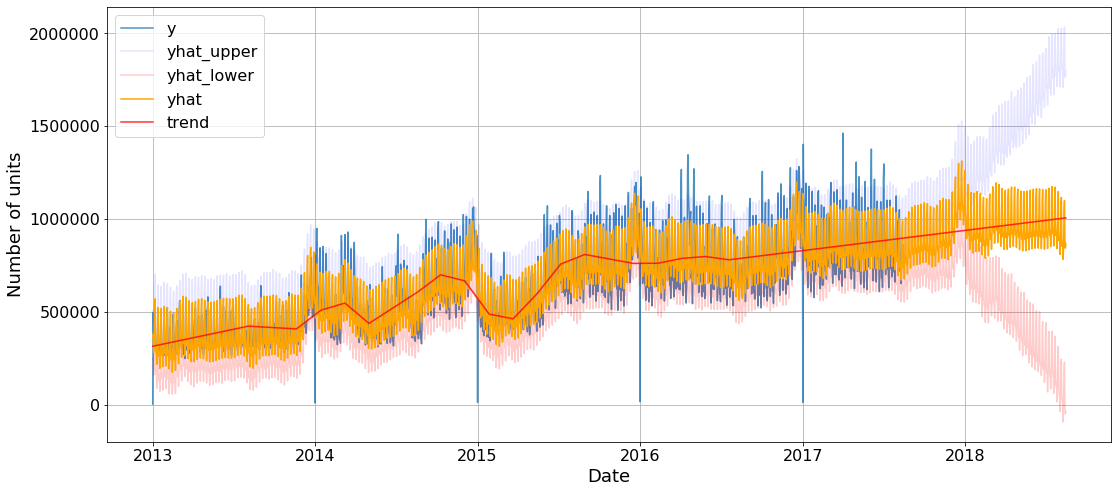

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


changepoint_prior_scale=1, RMSE: 9565577541.225435


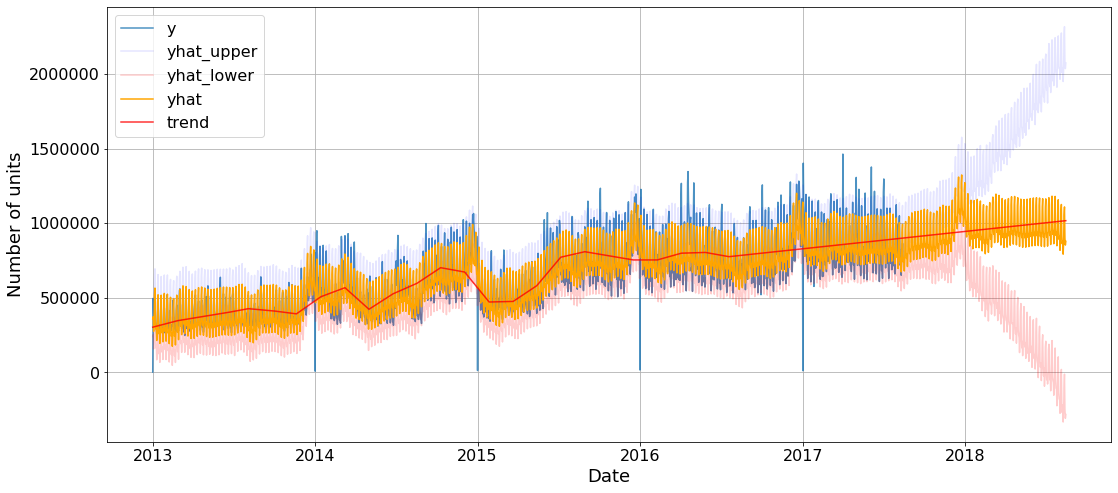

changepoint_prior_scale=2.5, RMSE: 9494044317.614542


In [55]:
# Experiment with the coefficient changepoint_prior_scale value

for i in [0.01, 0.1, 0.5, 1, 2.5]:
    m = Prophet(changepoint_prior_scale=i)
    m.fit(all_sales)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    f, ax = plt.subplots(1, 1, figsize=(18, 8))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    x_ticks = dates
    ax.plot(all_sales['ds'], all_sales['y'], alpha=0.8) 
    ax.plot(forecast['ds'], forecast['yhat_upper'], 'blue', alpha=0.1)
    ax.plot(forecast['ds'], forecast['yhat_lower'], 'r', alpha=0.2)
    ax.plot(forecast['ds'], forecast['yhat'], color='orange', alpha=1)
    ax.plot(forecast['ds'], forecast['trend'], 'r', alpha=0.8)
    ax.set_xlabel('Date', fontsize=18)
    ax.set_ylabel('Number of units', fontsize=18)
    ax.grid()
    ax.legend(['y', 'yhat_upper', 'yhat_lower', 'yhat', 'trend'], fontsize=16)
    plt.show()
    print(f'changepoint_prior_scale={i}, RMSE:', mean_squared_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))

The error decreases, but the graphs show that the predictions deteriorate and the model is overtrained.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


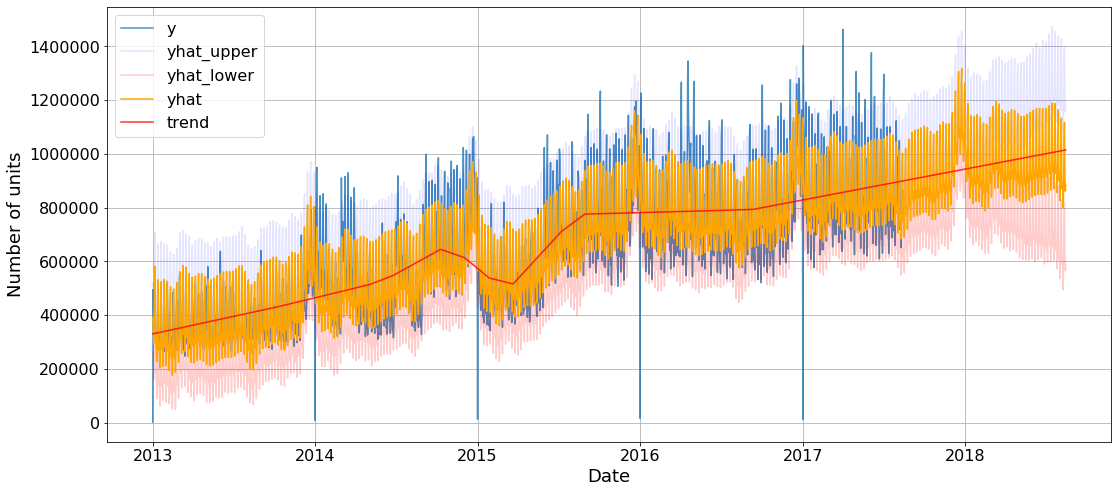

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


changepoint_prior_scale=0.15, RMSE: 10441563381.25702


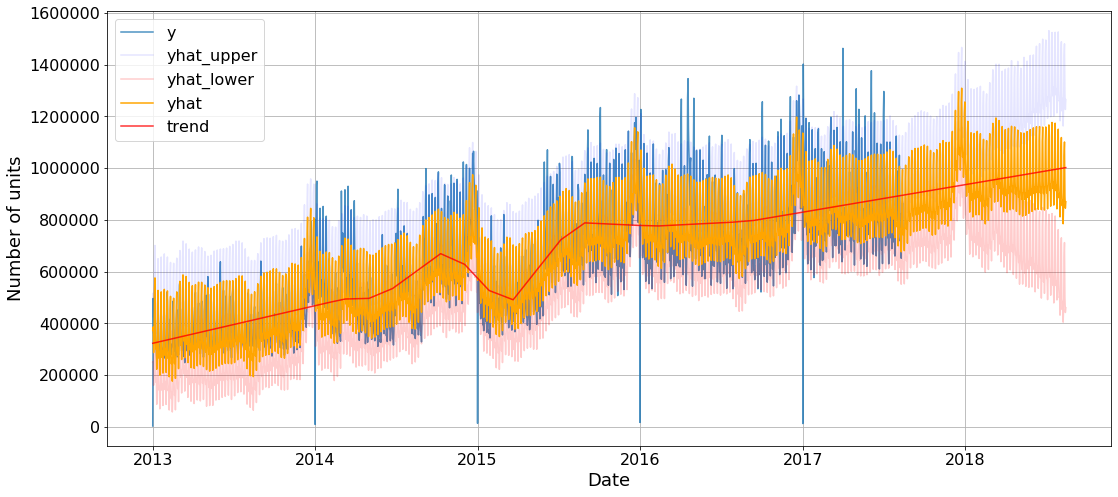

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


changepoint_prior_scale=0.2, RMSE: 10165595161.14076


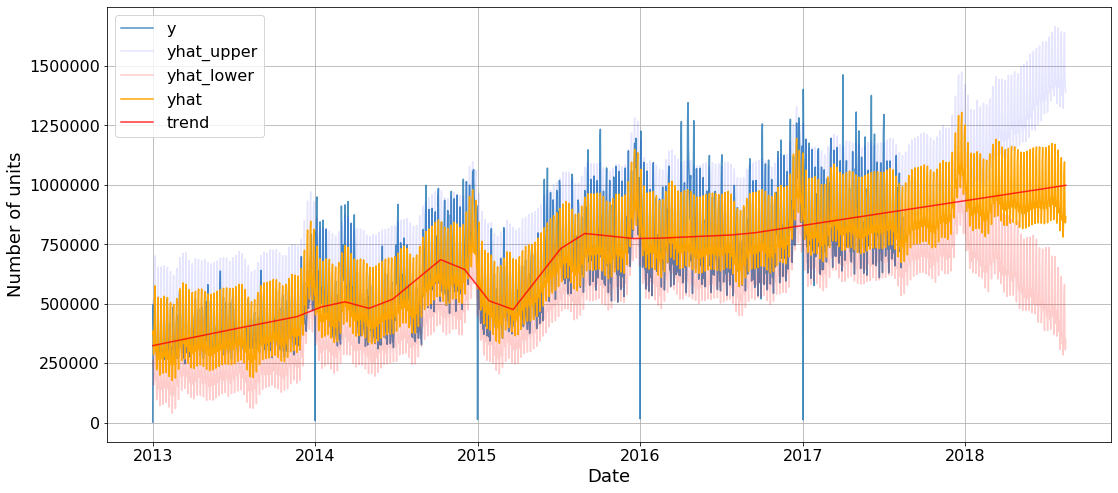

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


changepoint_prior_scale=0.3, RMSE: 9914103589.12956


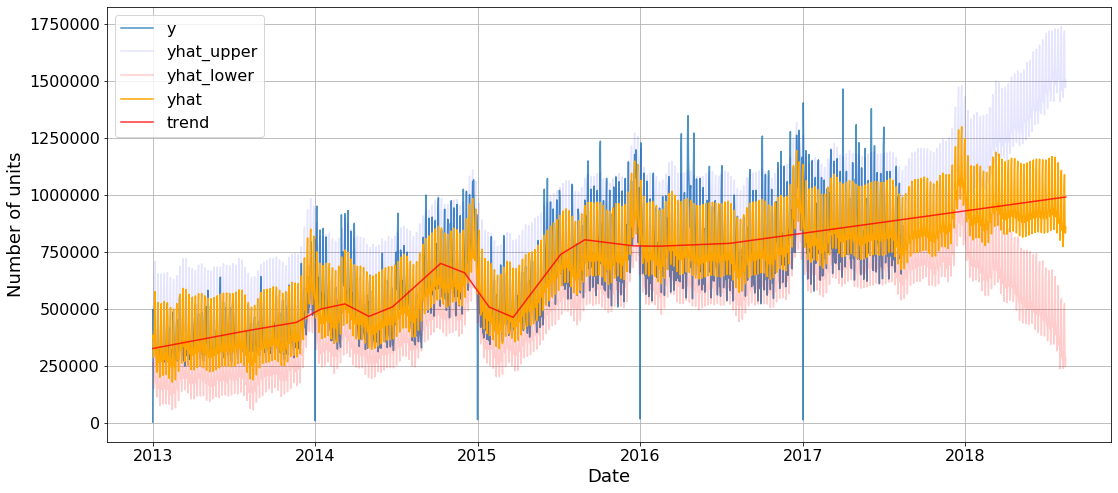

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


changepoint_prior_scale=0.4, RMSE: 9776982908.487524


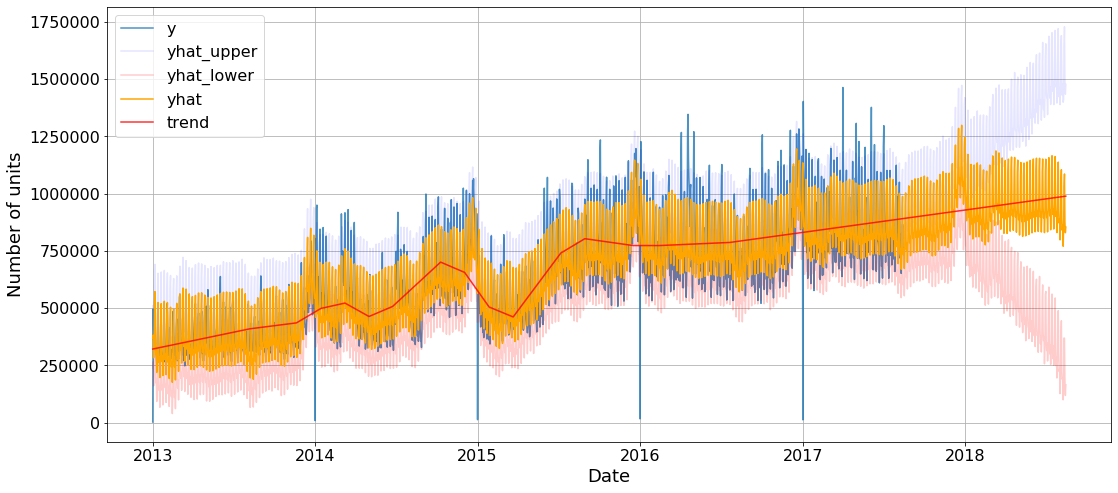

changepoint_prior_scale=0.45, RMSE: 9753766802.69321


In [56]:
# Take narrower range of values for changepoint_prior_scale

for i in [0.15, 0.2, 0.3, 0.4, 0.45]:
    m = Prophet(changepoint_prior_scale=i)
    m.fit(all_sales)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    f, ax = plt.subplots(1, 1, figsize=(18, 8))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    x_ticks = dates
    ax.plot(all_sales['ds'], all_sales['y'], alpha=0.8) 
    ax.plot(forecast['ds'], forecast['yhat_upper'], 'blue', alpha=0.1)
    ax.plot(forecast['ds'], forecast['yhat_lower'], 'r', alpha=0.2)
    ax.plot(forecast['ds'], forecast['yhat'], color='orange', alpha=1)
    ax.plot(forecast['ds'], forecast['trend'], 'r', alpha=0.8)
    ax.set_xlabel('Date', fontsize=18)
    ax.set_ylabel('Number of units', fontsize=18)
    ax.grid()
    ax.legend(['y', 'yhat_upper', 'yhat_lower', 'yhat', 'trend'], fontsize=16)
    plt.show()
    print(f'changepoint_prior_scale={i}, RMSE:', mean_squared_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))

Changepoint_prior_scale = 0.1 was chosen as optimal.

In [57]:
# Add monthly seasonality to the model (name='monthly', period=30.5, fourier_order=5). 

pr = Prophet(changepoint_prior_scale=0.1)
pr.add_seasonality(name='monthly', period=30.5, fourier_order=5)
pr.fit(all_sales)
future = pr.make_future_dataframe(periods=365)
forecast = pr.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  9427673785.024694
MAE:  67506.00577769238
MAPE:  37.41731002387839


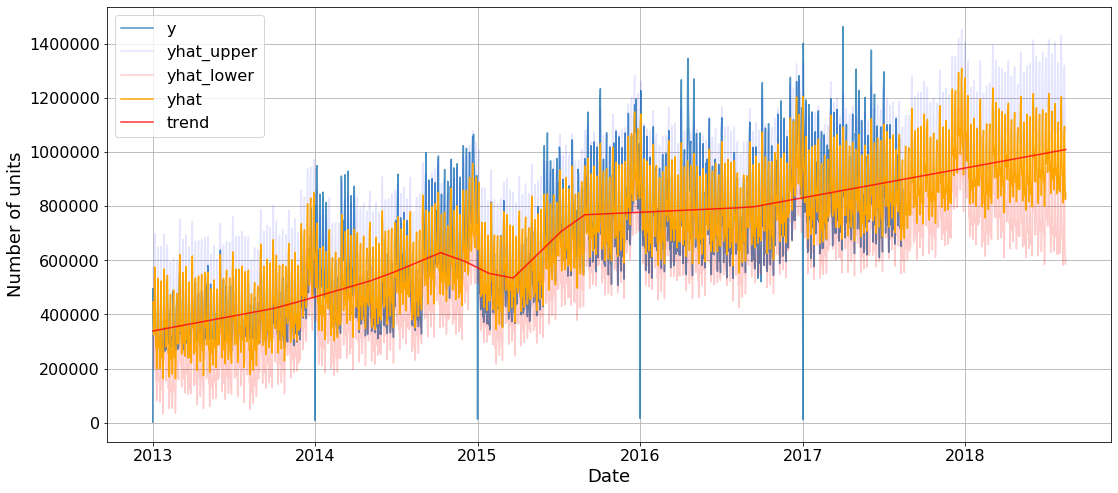

In [58]:
print(f'RMSE: ', mean_squared_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))
print(f'MAE: ', mean_absolute_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))
print(f'MAPE: ', mean_absolute_percentage_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))

f, ax = plt.subplots(1, 1, figsize=(18, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
x_ticks = dates
ax.plot(all_sales['ds'], all_sales['y'], alpha=0.8) 
ax.plot(forecast['ds'], forecast['yhat_upper'], 'blue', alpha=0.1)
ax.plot(forecast['ds'], forecast['yhat_lower'], 'r', alpha=0.2)
ax.plot(forecast['ds'], forecast['yhat'], color='orange', alpha=1)
ax.plot(forecast['ds'], forecast['trend'], 'r', alpha=0.8)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Number of units', fontsize=18)
ax.grid()
ax.legend(['y', 'yhat_upper', 'yhat_lower', 'yhat', 'trend'], fontsize=16)
plt.show()

Further error decrease can be observed.

In [59]:
# Add holidays data
holidays = pd.read_csv('holidays_events.csv')
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [60]:
holidays = holidays[holidays['transferred'] == False][['description', 'date']]
holidays.columns = ['holiday', 'ds']
holidays

,holiday,ds
0,Fundacion de Manta,2012-03-02
1,Provincializacion de Cotopaxi,2012-04-01
2,Fundacion de Cuenca,2012-04-12
3,Cantonizacion de Libertad,2012-04-14
4,Cantonizacion de Riobamba,2012-04-21
...,...,...
345,Navidad-3,2017-12-22
346,Navidad-2,2017-12-23
347,Navidad-1,2017-12-24
348,Navidad,2017-12-25


In [61]:
pr = Prophet(changepoint_prior_scale=0.1, holidays=holidays)
pr.add_seasonality(name='monthly', period=30.5, fourier_order=5)
pr.fit(all_sales)
future = pr.make_future_dataframe(periods=365)
forecast = pr.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
print(f'RMSE: ', mean_squared_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))
print(f'MAE: ', mean_absolute_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))
print(f'MAPE: ', mean_absolute_percentage_error(y_true=all_sales['y'], y_pred=forecast.loc[:1683, 'yhat']))

RMSE:  6252851127.899126
MAE:  56107.39263558193
MAPE:  20.802740080163126


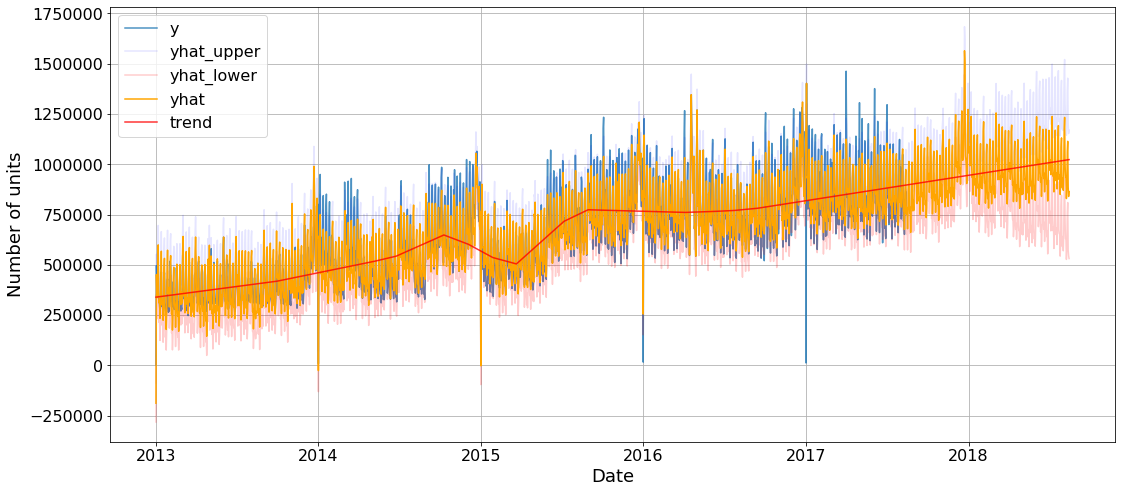

In [63]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
x_ticks = dates
ax.plot(all_sales['ds'], all_sales['y'], alpha=0.8) 
ax.plot(forecast['ds'], forecast['yhat_upper'], 'blue', alpha=0.1)
ax.plot(forecast['ds'], forecast['yhat_lower'], 'r', alpha=0.2)
ax.plot(forecast['ds'], forecast['yhat'], color='orange', alpha=1)
ax.plot(forecast['ds'], forecast['trend'], 'r', alpha=0.8)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Number of units', fontsize=18)
ax.grid()
ax.legend(['y', 'yhat_upper', 'yhat_lower', 'yhat', 'trend'], fontsize=16)
plt.show()

#### Conclusion

We managed to predict the general trend for an increase in the number of sales. We also managed to catch an increase in the number of sales before the New Year. The model was unable to identify a sharp drop in prices in early 2017, although it was able to spot such drops for previous years. As the result, it could not predict a similar drop in early 2018.

#### The best result
RMSE:  6247272850.8   
MAE:  56109.3   
MAPE:  20.8%   